In [112]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import statistics
from scipy.stats import norm

In [113]:
import string
def clean(s):
    head, sep, tail = s.partition('(')
    new = head.replace('[', '').replace(']', '').replace(' ', '')
    return float(new)


In [114]:
df = pd.read_excel(r'/home/ashwin/Git/general-physics-lab/atmass.xlsx')
print(df)

     atomic_num Symbol         Name     atomic_wt Notes
0             1      H     Hydrogen         1.008  3, 5
1             1      H          NaN             2   NaN
2             1      H          NaN             3   NaN
3             2     He          NaN             3   NaN
4             2     He       Helium  4.002 602(2)  1, 2
..          ...    ...          ...           ...   ...
116         114     Fl    Flerovium         [289]     4
117         115     Mc    Moscovium         [289]     4
118         116     Lv  Livermorium         [293]     4
119         117     Ts   Tennessine         [293]     4
120         118     Og    Oganesson         [294]     4

[121 rows x 5 columns]


In [123]:
Z=df['atomic_num'].to_numpy()
Elements=df['Symbol']
Elements_name=df['Name']


at_wt=[]
for i in df['atomic_wt']:
    if type(i)==str:
        i=clean(i)
    at_wt.append(i)
print(Z)
print(at_wt)
at_wt[0]=2

[  1   1   1   2   2   3   4   5   6   7   8   9  10  11  12  13  14  15
  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33
  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118]
[1.008, 2, 3, 3, 4.002602, 6.94, 9.0121831, 10.81, 12.011, 14.007, 15.999, 18.998403163, 20.1797, 22.98976928, 24.305, 26.9815384, 28.085, 30.973761998, 32.06, 35.45, 39.95, 39.0983, 40.078, 44.955907, 47.867, 50.9415, 51.9961, 54.938043, 55.845, 58.933194, 58.6934, 63.546, 65.38, 69.723, 72.63, 74.921595, 78.971, 79.904, 83.798, 85.4678, 87.62, 88.905838, 91.224, 92.90637, 95.95, 97.0, 101.07, 102.90549, 106.42, 107.8682, 112.414, 114.818, 118.71, 121.76, 127.6, 126.90447, 131.293, 132.90545196, 137.32

In [116]:
def BE(A,Z):
    a_v=15.5
    a_s=16.8
    a_c=0.72
    a_sym=23
    
    d = delta(A,Z)
    
    B = a_v*A-a_s*pow(A,2/3)-a_c*Z*(Z-1)*pow(A,-1/3)-a_sym*(A-2*Z)**2/A+d

    return B
    
def delta(A,Z):
    a_p = 34
    N=int(A-Z)
    
    if (int(Z)%2==0 and int(N)%2==0):
        return a_p * pow(A,-3/4)
        
    elif (int(Z)%2!=0 and int(N)%2!=0):
        return -1*a_p * pow(A,-3/4)
    
    elif (int(A)%2!=0):
        return 0

In [117]:
B = []
A = at_wt
for i in range(len(Z)):
    B.append(BE(A[i],Z[i]))


In [118]:
mp = 1.00727647
mn = 1.008665
one_amu = 931.5

In [119]:
BE=[]
for i in range(len(Z)):
    BE.append(( mp*Z[i]+mn*(round(at_wt[i]-Z[i]))- at_wt[i] )* one_amu)
    

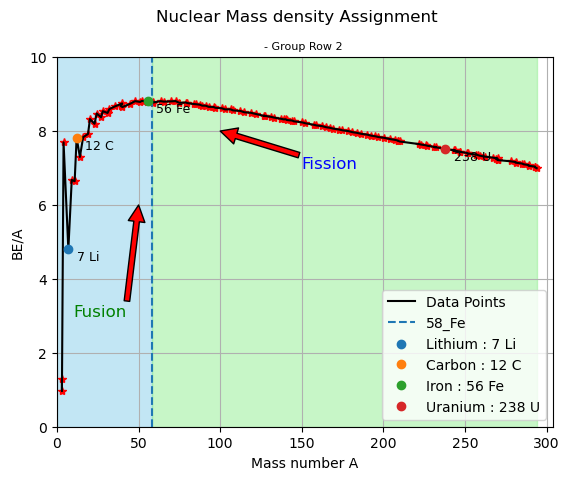

In [120]:
s=2
plt.figure()
plt.plot(np.array(A[s:]),np.array(B[s:])/np.array(A[s:]),'*r')
plt.plot(np.array(A[s:]),np.array(B[s:])/np.array(A[s:]), 'k',label="Data Points")
plt.axvline(x=58,linestyle="--",label="58_Fe")


plt.xlabel("Mass number A")
plt.ylabel("BE/A")
plt.grid("TRUE")
plt.suptitle(r"Nuclear Mass density Assignment")

printX=["U","Fe","C","Li"]

for i in range(len(Elements)):
    if Elements[i] in printX:
        plt.plot(np.array(A[i]),np.array(B[i])/np.array(A[i]), 'o',label="{0} : {1} {2}".format(Elements_name[i],round(A[i]),Elements[i]))
        plt.text(np.array(A[i])+5,-0.3+np.array(B[i])/np.array(A[i]) ,"{0} {1}".format(round(A[i]),Elements[i]), fontsize = 9)

plt.fill_between(np.linspace(0,58),0,10, color='skyblue', alpha=0.5)

plt.fill_between(np.linspace(58,max(A)),0,10, color='lightgreen', alpha=0.5)


plt.annotate('Fusion', xy = (50, 6), 
             fontsize = 12, xytext = (10, 3), 
             arrowprops = dict(facecolor = 'red'),
             color = 'g')

plt.annotate('Fission', xy = (100, 8), 
             fontsize = 12, xytext = (150, 7), 
             arrowprops = dict(facecolor = 'red'),
             color = 'b')

plt.title("- Group Row 2 ",fontsize=8)
plt.ylim(0,10)
plt.xlim(0,max(A)+10)

plt.legend()
plt.show()

In [121]:
def R(A):
    r0 = 1.2*pow(10,-15)
    return r0*pow(A,1/3)

def density(A,Z):
    mp = 1.00727647
    mn = 1.008665
    volume = 4/3*np.pi*pow(R(A),3)
    mass = Z*mp+(A-Z)*mn
    return mass/volume



def density2(A):
    mass_nuclion = 1.67 *pow(10,-27)
    #mn = 1.008665*pow(10,-27)
    r0 = 1.5*pow(10,-15)
    volume = (4/3)*np.pi*pow(r0,3)*A
    mass = A*mass_nuclion#Z*mp+(A-Z)*mn
    return mass/volume


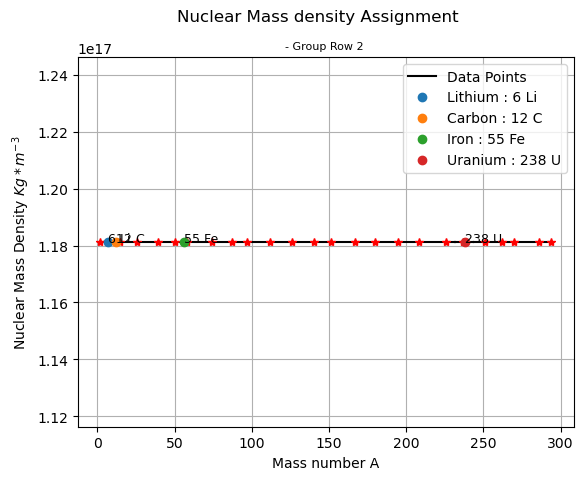

In [122]:
plt.plot(np.array(A,int),(density2(np.array(A,int))),"-k",label="Data Points")
plt.plot(np.array(A[::5],int),(density2(np.array(A[::5],int))),"*r")


for i in range(len(Elements)):
    k=1
    if Elements[i] in printX:
        plt.plot(np.array(A[i]),(density2(np.array(A[i],int))), 'o',label="{0} : {1} {2}".format(Elements_name[i],int(A[i]),Elements[i]))
        plt.text(np.array(A[i]),(density2(np.array(A[i],int))) ,"{0} {1}".format(int(A[i]),Elements[i]), fontsize = 9)
        k=k+1
        
plt.xlabel("Mass number A")
plt.ylabel(r"Nuclear Mass Density $Kg*m^{-3}$")
plt.grid("TRUE")
plt.suptitle(r"Nuclear Mass density Assignment")
plt.title("- Group Row 2 ",fontsize=8)

plt.legend()